In [1]:
import pandas as pd
import json
import os
import sys
sys.path.append(os.path.abspath("Functions/"))

import adding_features

## Adding the features to the words

In [2]:
with open('Data/vowels_list.json') as json_file:
    vowels_list = json.load(json_file)
with open('Data/consonants_list.json') as json_file:
    consonants_list = json.load(json_file)
with open('Data/dutch_char_list.json') as json_file:
    dutch_char_list = json.load(json_file)
with open('Data/punctuation_list.json') as json_file:
    punctuation_list = json.load(json_file)

In [13]:
accents_list = pd.read_csv("Data/accents_list.csv", index_col=0)
accents_list = accents_list['0'].values.tolist()

In [7]:
gt_words = pd.read_csv('Data/gt_words_for_feature_selection.csv', compression = 'gzip', index_col = 0)

In [10]:
gt_words.head(4)

,gt word,label
0,peryckelen,0
1,NaN,0
2,Mirandola.,0
3,Communions,0


In [35]:
len(gt_words)

324928

In [36]:
gt_words = gt_words.drop_duplicates()

In [37]:
len(gt_words)

324928

In [38]:
gt_words_ls = gt_words.values.tolist()

In [14]:
feature_scores_df = adding_features.Main(gt_words_ls, vowels_list, consonants_list, dutch_char_list, punctuation_list,accents_list)

In [15]:
feature_scores_df

,word,garbage_score,word_length,vowels,consonants,vowelandconsonant,punctuation,dutch_letters,upper,lower,...,word_numbers_ratio,word_alpha_ratio,word_accents_ratio,word_other_characters_ratio,word_vowels_consonant_ratio,word_consonant_vowels_ratio,max_count_same_char,max_count_strip_same_char,max_consecutive_consonants,max_consecutive_vowels
0,peryckelen,0,10,4,6,10,0,10,0,10,...,0.0,1.000000,0.0,0.0,0.666667,1.500000,1,1,2,1
1,nan,0,3,1,2,3,0,3,0,3,...,0.0,1.000000,0.0,0.0,0.500000,2.000000,1,1,1,1
2,Mirandola.,0,10,4,5,9,0,9,0,8,...,0.0,0.900000,0.0,0.0,0.800000,1.250000,1,1,2,1
3,Communions,0,10,4,6,10,0,10,0,9,...,0.0,1.000000,0.0,0.0,0.666667,1.500000,2,2,2,2
4,Constantinopolen:,0,17,6,10,16,0,16,0,15,...,0.0,0.941176,0.0,0.0,0.600000,1.666667,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324923,"Mainart,",0,8,3,4,7,0,7,0,6,...,0.0,0.875000,0.0,0.0,0.750000,1.333333,1,1,2,2
324924,40000,0,5,0,0,0,0,0,0,0,...,1.0,0.000000,0.0,0.0,0.000000,0.000000,4,4,0,0
324925,gragt,0,5,1,4,5,0,5,0,5,...,0.0,1.000000,0.0,0.0,0.250000,4.000000,1,1,2,1
324926,"niettegenstaende,",0,17,7,9,16,0,16,0,16,...,0.0,0.941176,0.0,0.0,0.777778,1.285714,2,2,3,2


### Visuale the distributions

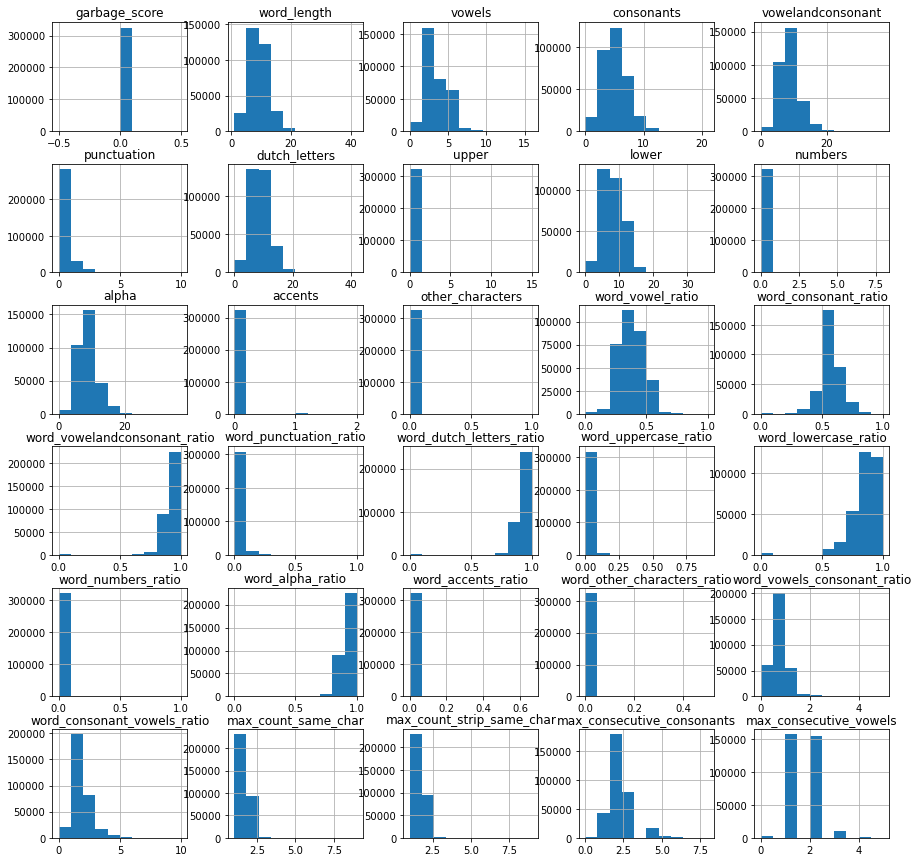

In [16]:
hist = feature_scores_df.hist(figsize=(15, 15))

## Determine cut-off points (based on 95%)

In [22]:
feature_scores_df['word_length'].quantile(0.95)

15.0

In [24]:
feature_scores_df['word_length'].quantile(0.0)

1.0

In [25]:
feature_scores_df['word_vowel_ratio'].quantile(0.9)

0.5

In [26]:
feature_scores_df['word_vowel_ratio'].quantile(0.05)

0.2222222222222222